In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the number of expected events in 10 years for an E^2 source at the horizon

8.487550560800202


[]

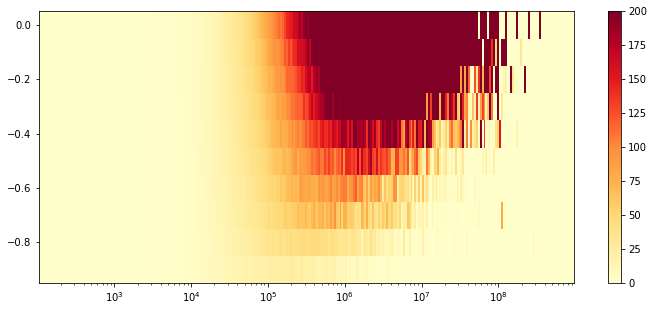

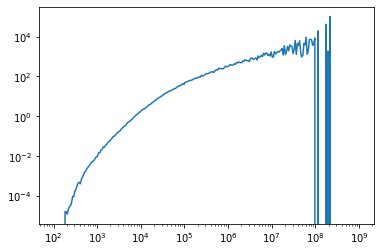

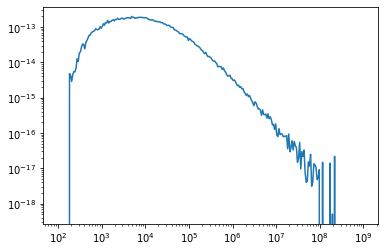

In [5]:
# Load Aeff data
with h5py.File("../dev/statistical_model/4_tracks_and_cascades/aeff_input_tracks/effective_area.h5", 'r') as f:
    area10 = f['2010/nu_mu/area'][()]
    tE_bin_edges = f['2010/nu_mu/bin_edges_0'][:] # True Energy [GeV]
    cosz_bin_edges = f['2010/nu_mu/bin_edges_1'][:] # cos(zenith)
    rE_bin_edges = f['2010/nu_mu/bin_edges_2'][:] # Reco Energy [GeV]
    
tE_binc = 0.5*(tE_bin_edges[:-1]+tE_bin_edges[1:])
rE_binc = 0.5*(rE_bin_edges[:-1]+rE_bin_edges[1:])
cosz_binc = 0.5*(cosz_bin_edges[:-1]+cosz_bin_edges[1:])

fig, axs = plt.subplots(1, 1, figsize=(12, 5))
cmesh = axs.pcolormesh(tE_binc, cosz_binc, area10.sum(axis=2).T,
                          vmax=200, cmap=plt.cm.YlOrRd)
axs.set_xscale("log")
fig.colorbar(cmesh)
plt.figure()

plt.plot(tE_binc, area10.sum(axis=2)[:, -1])
plt.loglog()

tE_bw = np.diff(tE_bin_edges)

flux = lambda energy: 1E-12* 1/(1E-4) * (energy/1E3)**-2 * 1E-3

eff_a_int = (flux(tE_binc) * area10.sum(axis=2)[:, -1] * tE_bw * np.pi*1E7*10).sum()
print(eff_a_int)
plt.figure()
plt.plot(tE_binc, area10.sum(axis=2)[:, -1]*flux(tE_binc))
plt.loglog()
